# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].nunique()
mice_count


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice = merged_data[merged_data[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicated_mice_id = duplicated_mice['Mouse ID'].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id = merged_data[merged_data['Mouse ID'].isin(duplicated_mice['Mouse ID'])]
duplicated_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[~merged_data['Mouse ID'].isin(duplicated_id['Mouse ID'])].reset_index(drop=True)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                                   'Median Tumor Volume': tumor_median,
                                   'Tumor Volume Variance': tumor_var,
                                   'Tumor Volume Std. Dev.': tumor_std,
                                   'Tumor Volume Std. Err.': tumor_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

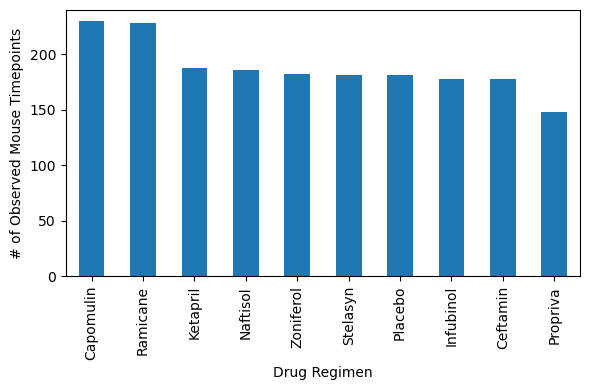

In [10]:
drugs_count = pd.DataFrame(cleaned_df['Drug Regimen'].value_counts()).reset_index()
tick_location = drugs_count.index
plt.figure(figsize=(6,4))
plt.bar(drugs_count['Drug Regimen'], drugs_count['count'], align='center', width=.50)
plt.xticks(tick_location, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.5, len(drugs_count)-.5)
plt.ylim(0, max(drugs_count['count']+10))
plt.tight_layout()
plt.show()

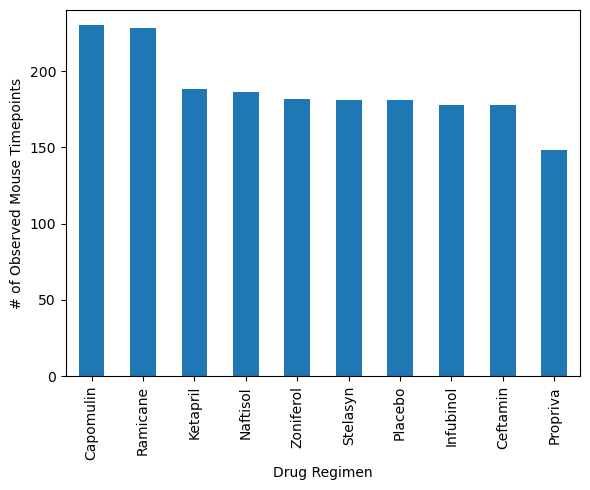

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs_count = pd.DataFrame(cleaned_df['Drug Regimen'].value_counts()).reset_index()
tick_location = drugs_count.index
plt.figure(figsize=(6,5))
plt.bar(drugs_count['Drug Regimen'], drugs_count['count'], align='center', width=.50)
plt.xticks(tick_location, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.5, len(drugs_count)-.5)
plt.ylim(0, max(drugs_count['count']+10))
plt.tight_layout()
plt.show()

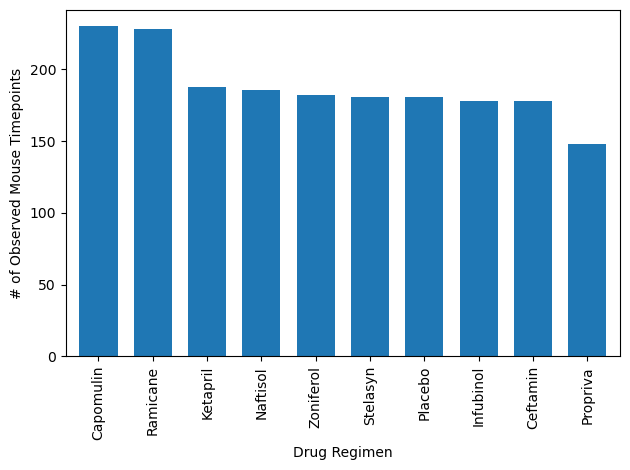

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_bar = drugs_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', legend=False, width=.7)
xticks = drugs_count['Drug Regimen']
drug_count_bar.set_xticklabels(xticks, rotation=90)
plt.tight_layout()
plt.show()

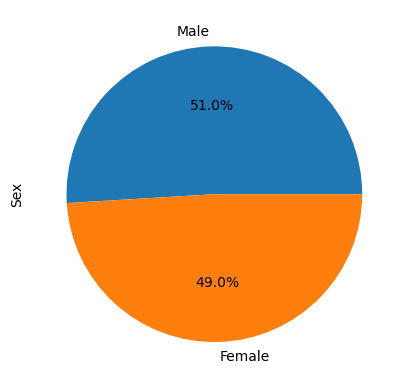

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = pd.DataFrame(cleaned_df['Sex'].value_counts())
plt.pie(mice_sex['count'], labels=mice_sex.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

<Axes: ylabel='Sex'>

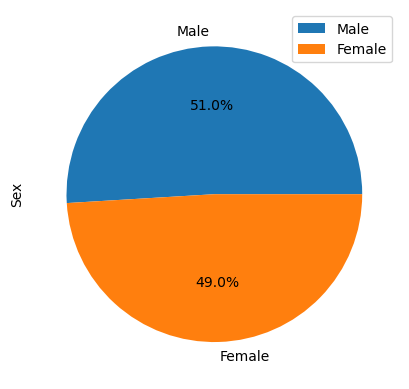

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex.plot(kind='pie', y='count', ylabel='Sex', autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') | (cleaned_df['Drug Regimen'] == 'Ramicane')
                            | (cleaned_df['Drug Regimen'] == 'Infubinol') | (cleaned_df['Drug Regimen'] == 'Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = reduced_df.groupby(cleaned_df['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
treatment_df.reset_index(drop=True)
treatment_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_data = treatment_df[treatment_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # add subset 
    tumor_vol.append(subset_data)
    # Calculating the IQR, upper quartile and lower quartile:
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = round(upper_quartile - lower_quartile, 3)
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lower_quartile - 1.5 * iqr, 3)
    upper_bound = round(upper_quartile + 1.5 * iqr, 3)

    potential_outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]
    print(f"{treatment} lower boundary is: {lower_bound}")
    print(f"{treatment} upper boundary is: {upper_bound}")
    print(f"IQR for {treatment} is: {iqr}")
    print('-------------------------------------')



Capomulin lower boundary is: 20.704
Capomulin upper boundary is: 51.832
IQR for Capomulin is: 7.782
-------------------------------------
Ramicane lower boundary is: 17.912
Ramicane upper boundary is: 54.308
IQR for Ramicane is: 9.099
-------------------------------------
Infubinol lower boundary is: 36.833
Infubinol upper boundary is: 82.741
IQR for Infubinol is: 11.477
-------------------------------------
Ceftamin lower boundary is: 25.355
Ceftamin upper boundary is: 87.667
IQR for Ceftamin is: 15.578
-------------------------------------


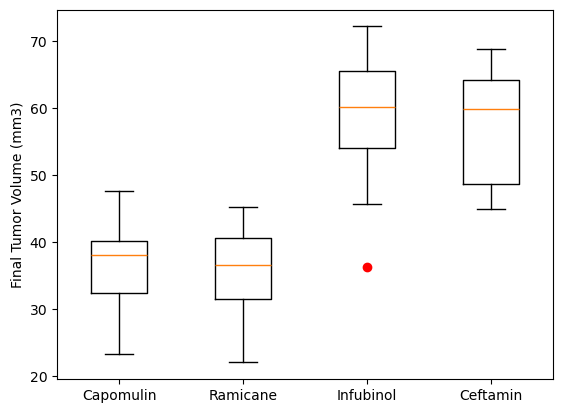

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_chart = plt.subplot()
plt.boxplot(tumor_vol, labels=treatments, sym='r')
plt.ylabel('Final Tumor Volume (mm3)')


plt.show()

## Line and Scatter Plots

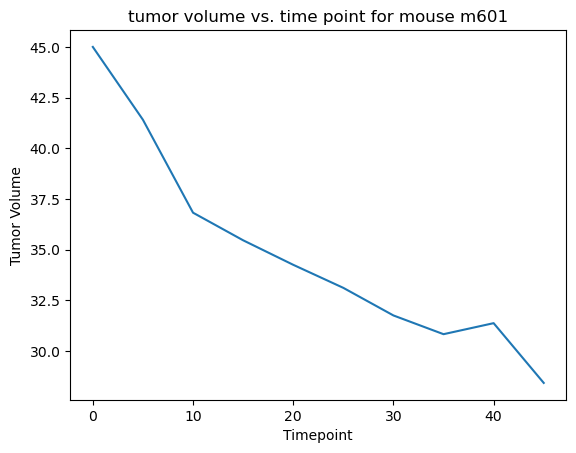

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 'm601')]
plt.title('tumor volume vs. time point for mouse m601')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.show()

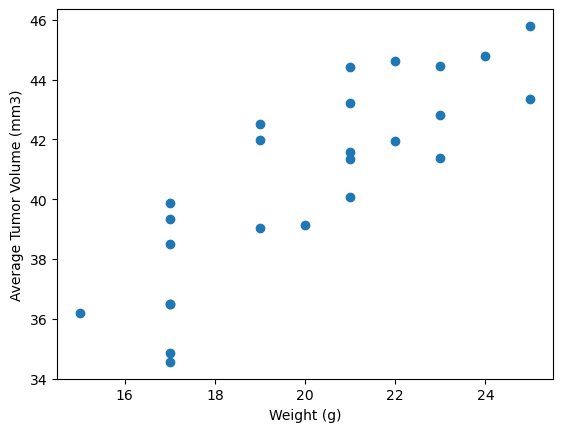

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data_scatter = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
grouped_capomulin = capomulin_data_scatter.groupby('Mouse ID')
# merged_scatter = pd.merge(capomulin_data_scatter, avg_tumor_data, on='Mouse ID', suffixes=('_weight', '_avg Tumor'))

weight = grouped_capomulin['Weight (g)'].mean()
avg_tumor = grouped_capomulin['Tumor Volume (mm3)'].mean()

scatter = pd.DataFrame({'Weight (g)': weight, 'Average Tumor Volume': avg_tumor})
plt.scatter(weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The Correlation between mouse weight and average tumor volume is 0.84


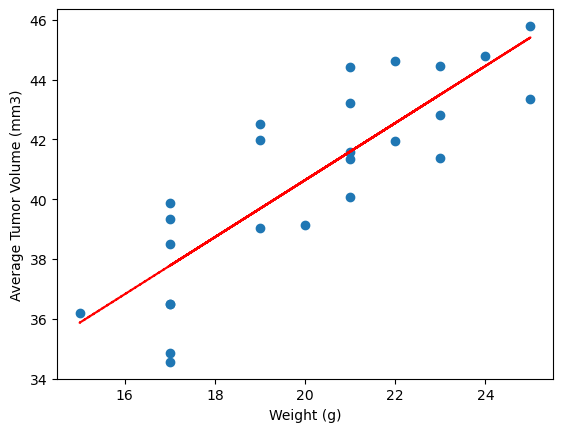

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor)
print(f"The Correlation between mouse weight and average tumor volume is {round(correlation[0], 2)}")

x_value = weight
y_value = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value,'r--')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
